In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

import plotly.graph_objects as go



# Data Importing

In [2]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.isna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df = df.rename(columns = {df.columns[0]: "Game_Rank"}, inplace=False)

In [7]:
df.head()

,Game_Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
drop_row = df[df['Year'] > 2015].index
df = df.drop(drop_row)

*There is not enough data to evaluate after 2015 so i dropped to data after that year*

In [9]:
df['Genre'].value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

In [10]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1331
Activision                       961
Ubisoft                          907
Namco Bandai Games               892
Konami Digital Entertainment     824
                                ... 
Answer Software                    1
Ecole                              1
Yumedia                            1
HAL Laboratory                     1
Rain Games                         1
Name: count, Length: 566, dtype: int64

In [11]:
df['Platform'].value_counts()

Platform
DS      2162
PS2     2161
Wii     1325
PS3     1297
X360    1257
PSP     1213
PS      1196
PC       922
XB       824
GBA      822
GC       556
3DS      474
PSV      351
N64      319
SNES     239
PS4      228
SAT      173
XOne     159
WiiU     133
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

# How many unique "Games, Publisher, Platforms, Genres" we have ?

In [12]:
games = df['Name'].unique()
publisher = df['Publisher'].unique()
platforms = df['Platform'].unique()
genres = df['Genre'].unique()

In [13]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'gold','size':20}},
    number={'font':{'color': 'gold','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'darkviolet','size':20}},
    number={'font':{'color': 'darkviolet','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'deepskyblue','size':20}},
    number={'font':{'color': 'deepskyblue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})
fig.show()

<Axes: xlabel='Platform', ylabel='count'>

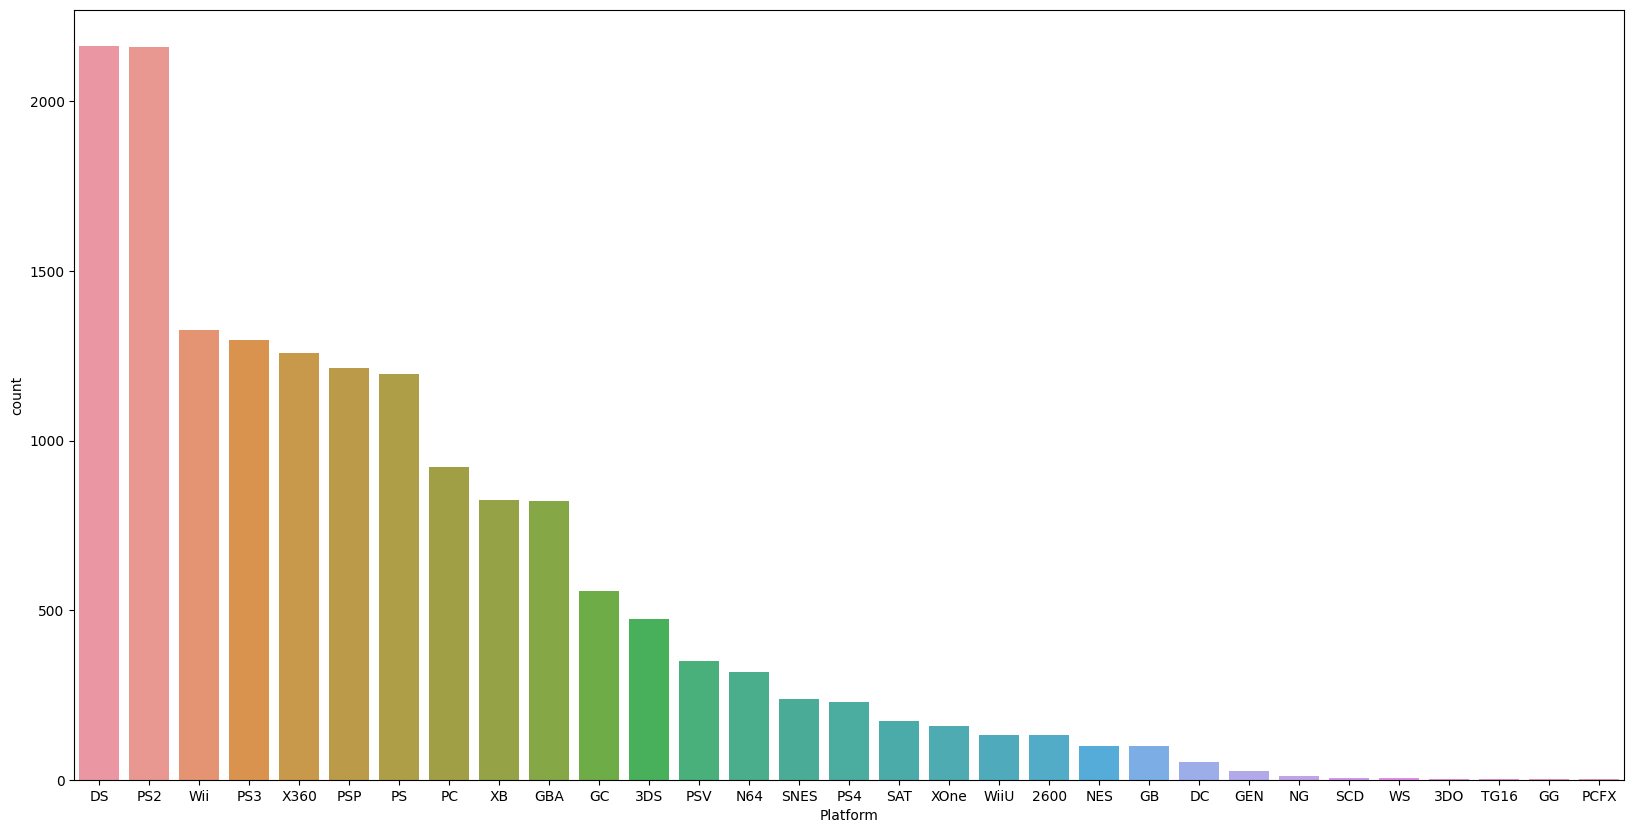

In [14]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Platform", data=df, order = df['Platform'].value_counts().index)


<Axes: xlabel='Genre', ylabel='count'>

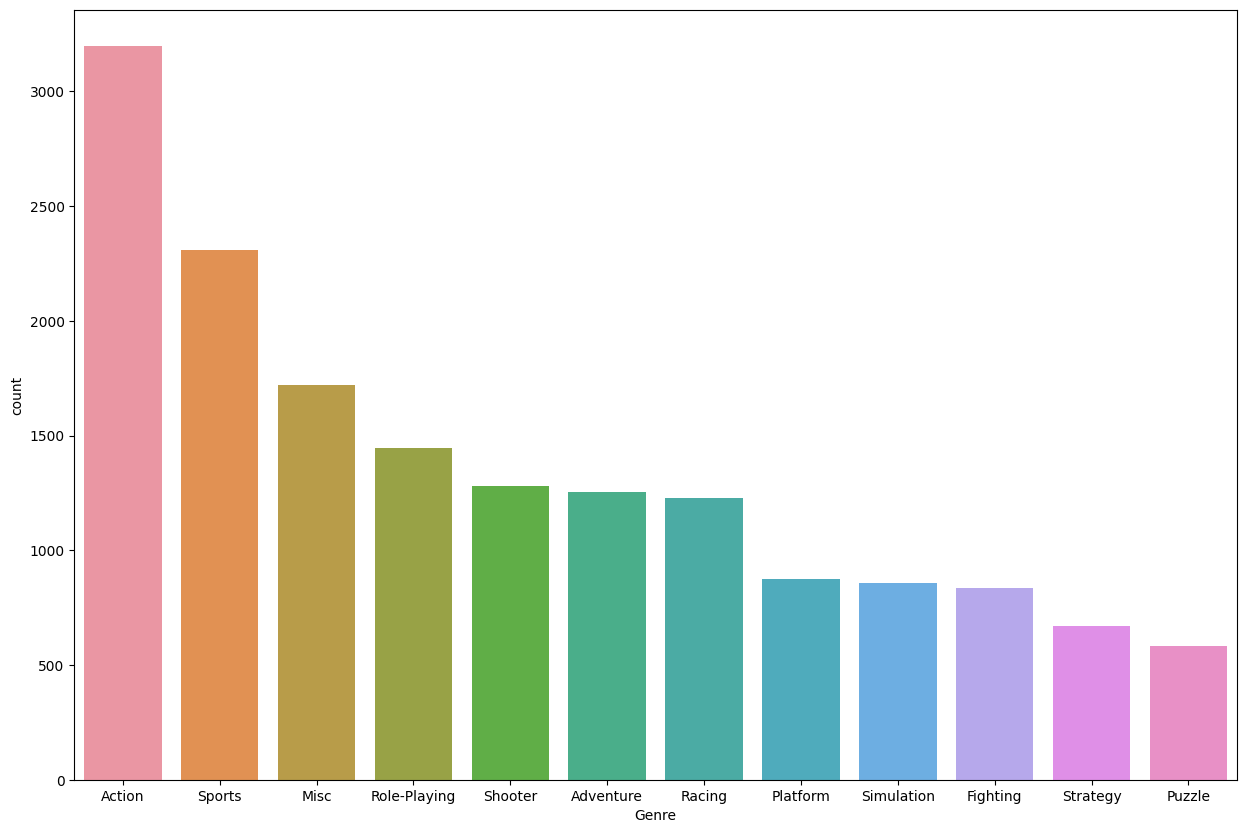

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1985.0'),
  Text(2, 0, '1984.0'),
  Text(3, 0, '1988.0'),
  Text(4, 0, '1987.0'),
  Text(5, 0, '1990.0'),
  Text(6, 0, '1989.0'),
  Text(7, 0, '1983.0'),
  Text(8, 0, '1986.0'),
  Text(9, 0, '1982.0'),
  Text(10, 0, '1991.0'),
  Text(11, 0, '1992.0'),
  Text(12, 0, '1981.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '2000.0'),
  Text(20, 0, '1998.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2013.0'),
  Text(23, 0, '2014.0'),
  Text(24, 0, '2015.0'),
  Text(25, 0, '2012.0'),
  Text(26, 0, '2004.0'),
  Text(27, 0, '2003.0'),
  Text(28, 0, '2002.0'),
  Text(29, 0, '2005.0'),
  Text(30, 0, '2006.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2007.0'),
  Text(33, 0, '

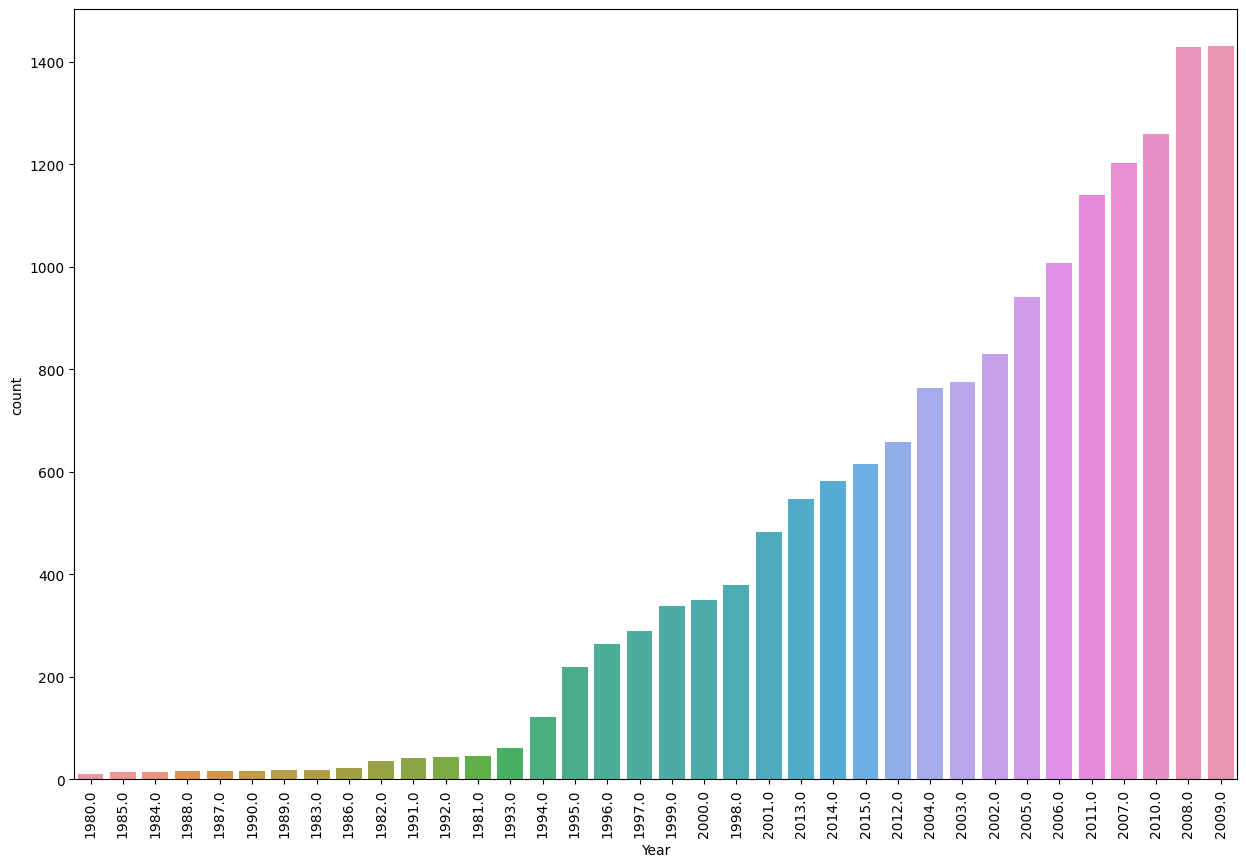

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=True).index)
plt.xticks(rotation = 90)

# Top 3 years game releases by genre.

(array([0, 1, 2]),
 [Text(0, 0, '2009.0'), Text(1, 0, '2008.0'), Text(2, 0, '2010.0')])

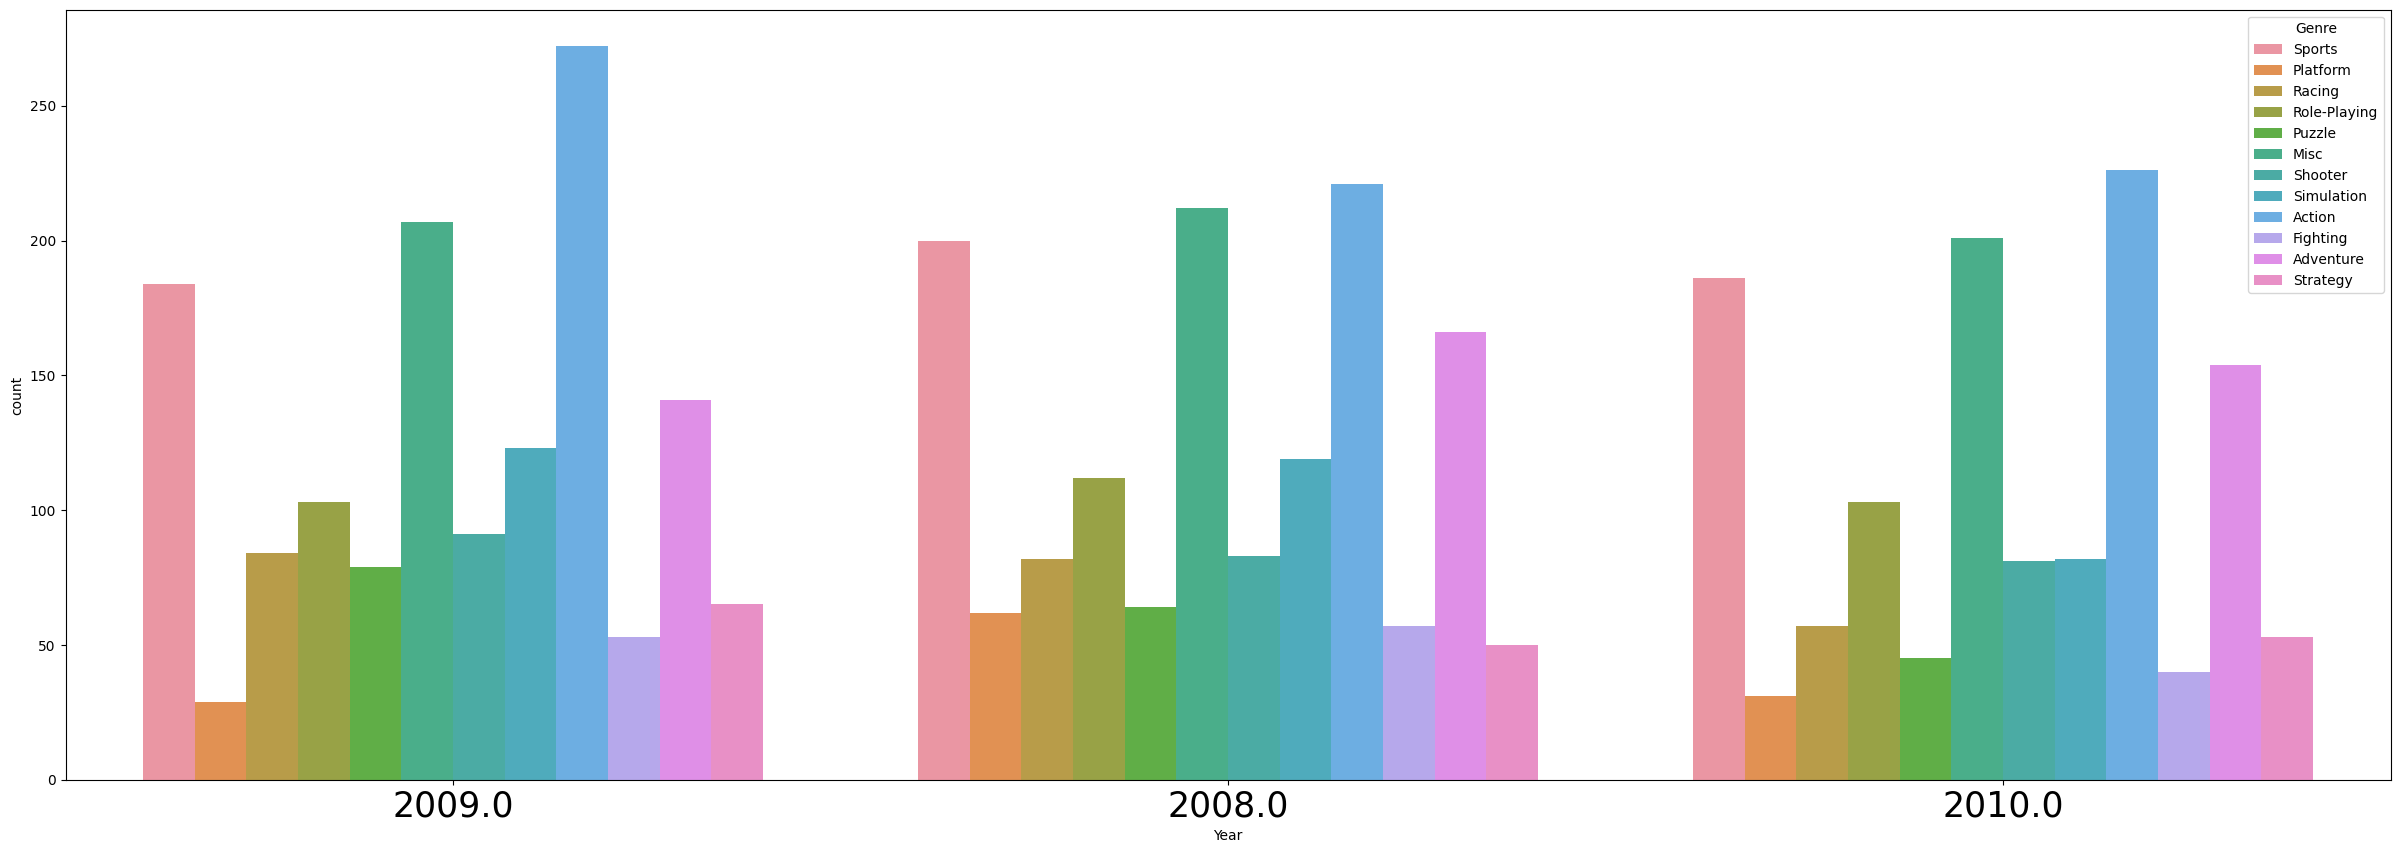

In [17]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:3].index)
plt.xticks(size=25, rotation=0)

# Highest Sales Numbers Worldwide

In [18]:
data_year = df.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year.sort_values(by=['Global_Sales'], ascending=False)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

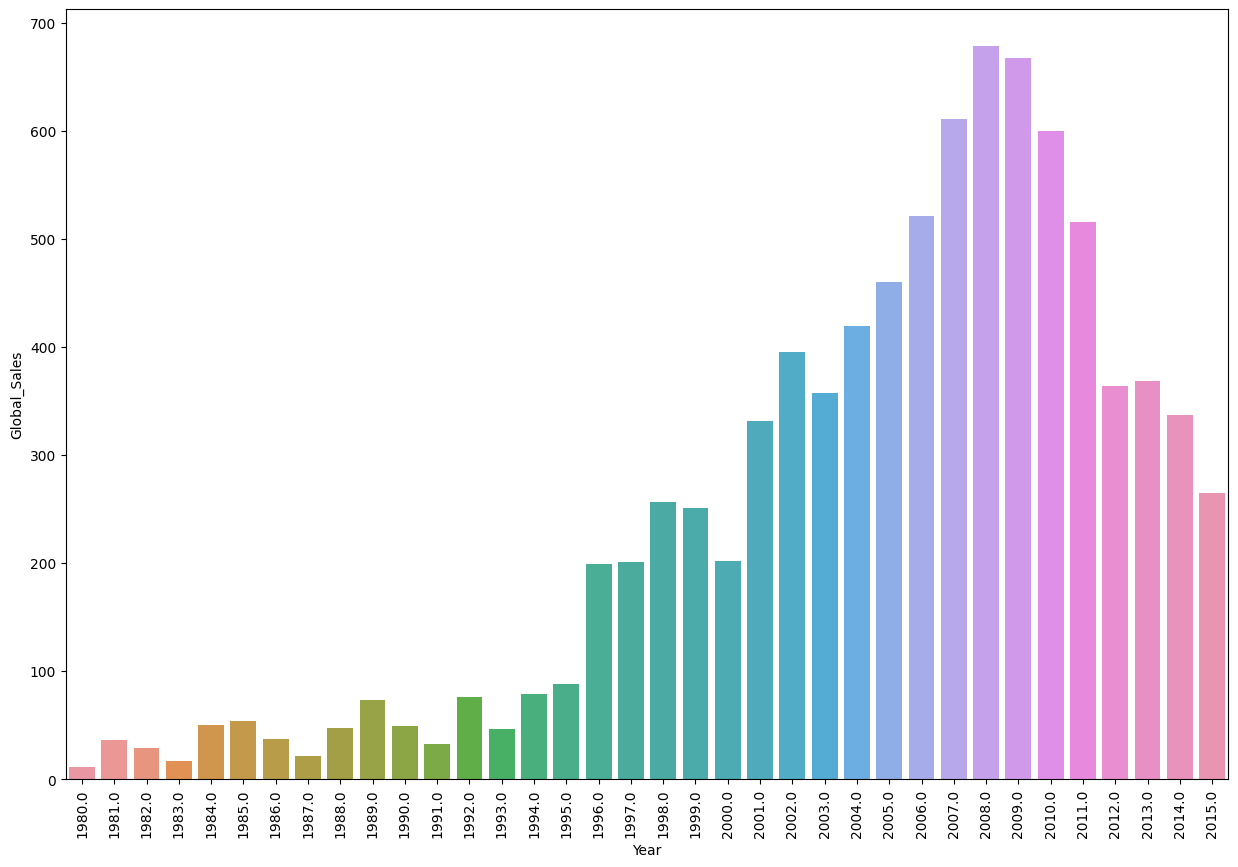

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

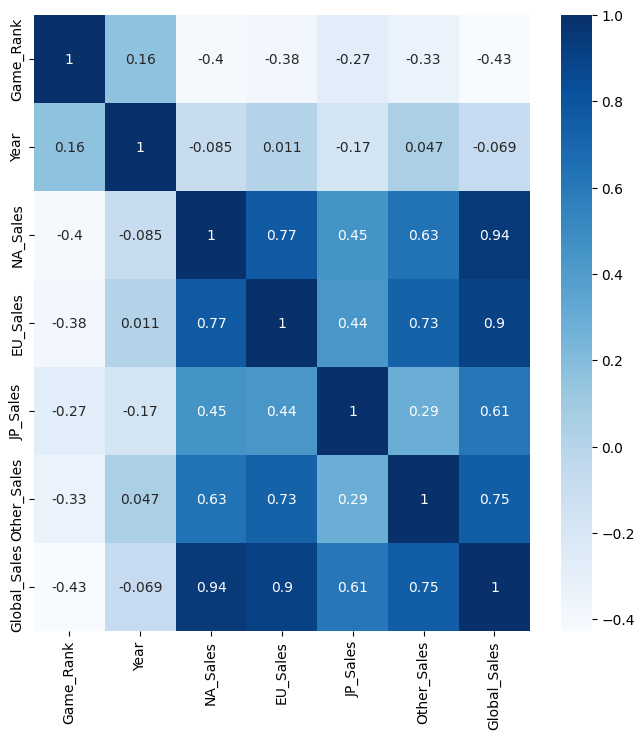

<Figure size 800x800 with 0 Axes>

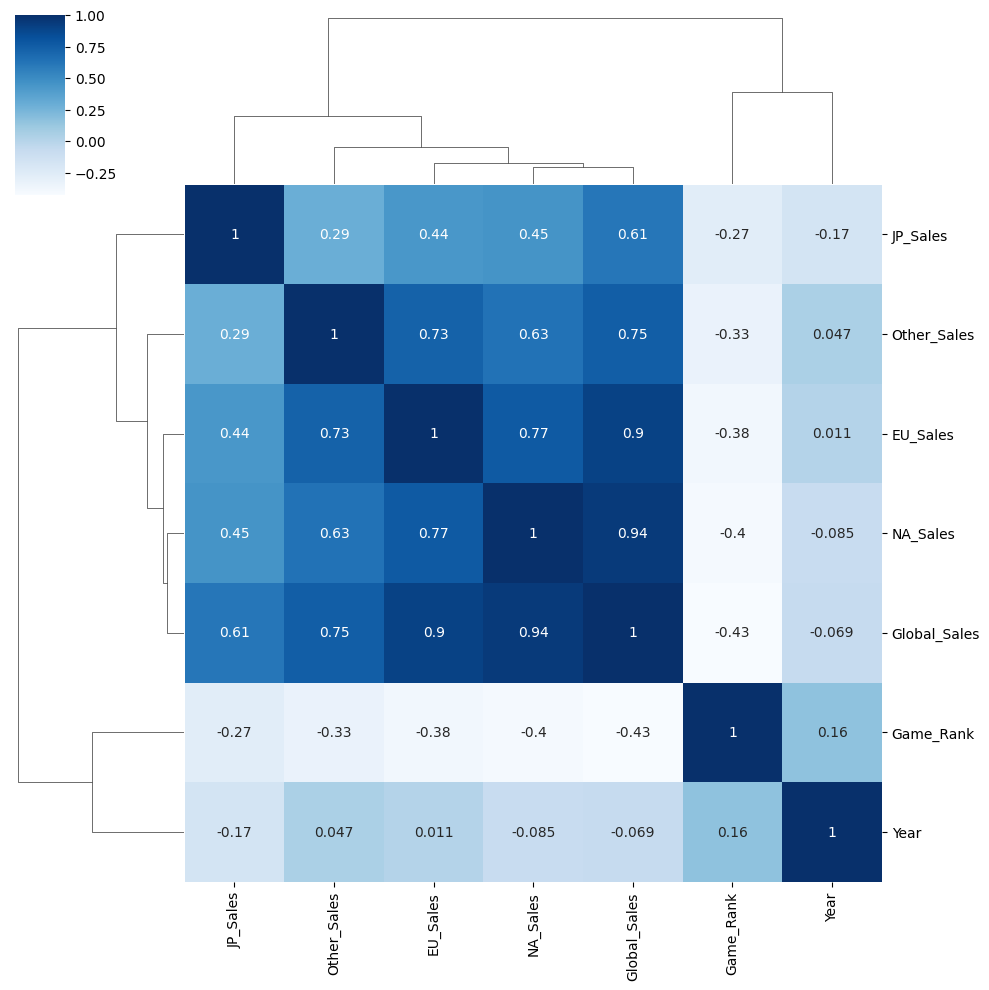

In [20]:
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

plt.figure(figsize=(8, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='Blues')
plt.show()


Text(0.5, 1.0, 'Games According to Genre')

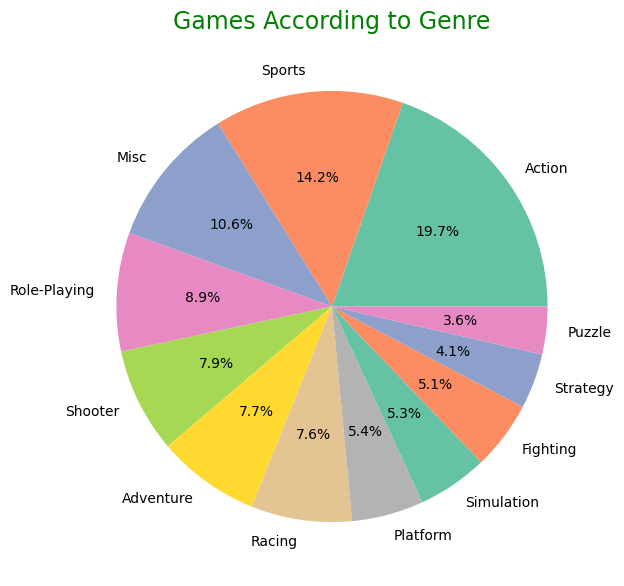

In [21]:
labels= df.Genre.value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
sizes = df.Genre.value_counts().values
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Games According to Genre',fontsize = 17,color = 'green')

In [22]:
#World rank of the top 100 video games, japan sales and europe sales.
df=df.loc[:99,:] # data.iloc[:100,:] -- data.head(100)

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

trace1=go.Scatter(
                x=df.Game_Rank,
                y=df.JP_Sales,
                mode="lines+markers",
                name="JP Sales",
                marker= dict(color = 'rgba(158, 90, 10, 0.7)'),
                text=df.Name)
trace2=go.Scatter(
                x=df.Game_Rank,
                y=df.EU_Sales,
                mode="lines",
                name="Europe Sales",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)'),
                text=df.Name)

edit_df=[trace1,trace2]
layout=dict(title="World rank of the top 100 video games, japan and europe sales .",
            xaxis=dict(title="World Rank",tickwidth=5,ticklen=8,zeroline=False))
fig=dict(data=edit_df,layout=layout)
iplot(fig)

In [23]:
# data preparation
dataGenre_list=list(df.Genre.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in dataGenre_list:
    val=df[df.Genre==i]
    na_sales.append(val.NA_Sales.mean())
    eu_sales.append(val.EU_Sales.mean())
    jp_sales.append(val.JP_Sales.mean())
    other_sales.append(val.Other_Sales.mean())
    global_sales.append(val.Global_Sales.mean())
    
df1=pd.DataFrame({"Genre":dataGenre_list,"NA_Sales":na_sales,"EU_Sales":eu_sales,"JP_Sales":jp_sales,"Other_Sales":other_sales,"Global_Sales":global_sales})

# data visualization
trace1=go.Scatter(
                x=df1.Genre,
                y=df1.NA_Sales,
                mode="lines+markers",
                name="North America Sales",
                marker= dict(color = 'grey'))
trace2=go.Scatter(
                x=df1.Genre,
                y=df1.EU_Sales,
                mode="lines",
                name="Europe Sales",
                marker=dict(color = 'blue'))
trace3=go.Scatter(
                x=df1.Genre,
                y=df1.JP_Sales,
                mode="lines+markers",
                name="Japan Sales",
                marker=dict(color = 'orange'))
trace4=go.Scatter(
                x=df1.Genre,
                y=df1.Other_Sales,
                mode="lines",
                name="Other Sales",
                marker=dict(color = 'green'))
trace5=go.Scatter(
                x=df1.Genre,
                y=df1.Global_Sales,
                mode="lines+markers",
                name="Global Sales",
                marker=dict(color = 'black'))
edit_df=[trace1,trace2,trace3,trace4,trace5]
layout=dict(title="The genres according to the average sales",
            xaxis=dict(title="  Genre of Video Games",tickwidth=5,ticklen=8,zeroline=False))
fig=dict(data=edit_df,layout=layout)
plt.savefig('graph.png')
iplot(fig)

<Figure size 640x480 with 0 Axes>

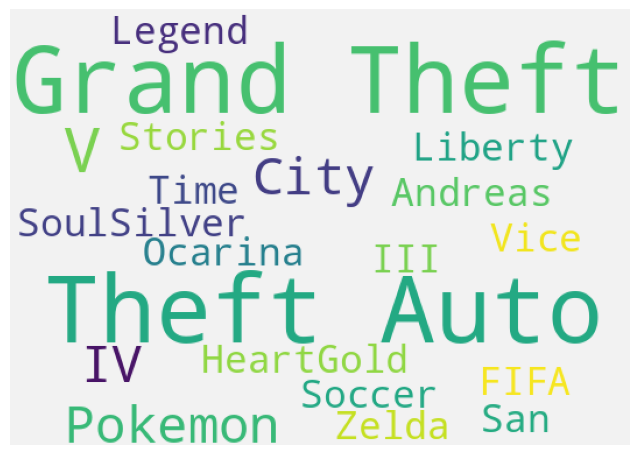

In [24]:
# Which video games is mentioned most at Genre of Action..
# data prepararion
w_data = df[df.Genre == 'Action'].iloc[:50,:]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                        background_color='#f2f2f2',
                        width=532,
                        height=374
                     ).generate(" ".join(w_data.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()